In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))
import bayesflow as bf
from amortizer import amortizer, model
from src.models.MixtureNormal import modelFixedContext, configurator, constrain_parameters
import numpy as np


/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 6)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 178, 4)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Shape of simulation non-batchable context: (2,)
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from checkpoints/amortizer/history_100.pkl.
INFO:root:Networks loaded from checkpoints/amortizer/ckpt-100
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [2]:
modelFixed = modelFixedContext(n_obs=200, n_rep=3)

df = configurator(modelFixed(1000))

INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 6)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 200, 4)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:Shape of simulation non-batchable context: (2,)
INFO:root:No optional simulation batchable context provided.


In [3]:
(z, _), _ = amortizer(df)

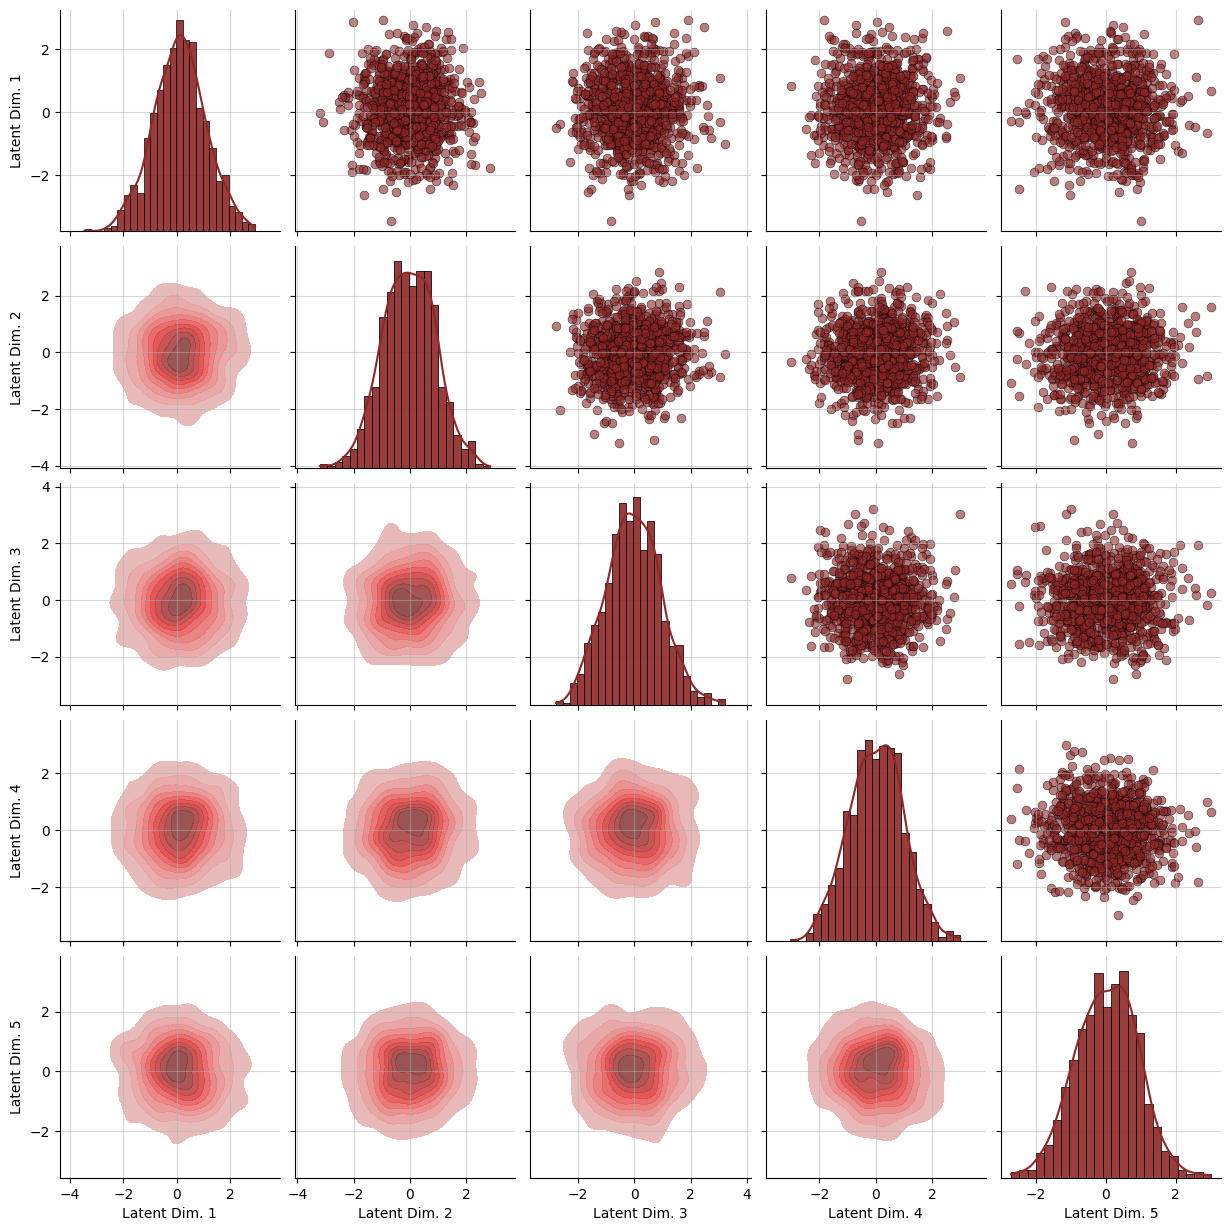

In [4]:
f = bf.diagnostics.plot_latent_space_2d(z)

## Calibration (parameter posterior approximator)

### Unonstrained space

In [5]:
prior = df['posterior_inputs']['parameters']
posterior = amortizer.amortized_posterior.sample(df['posterior_inputs'], n_samples=1000)

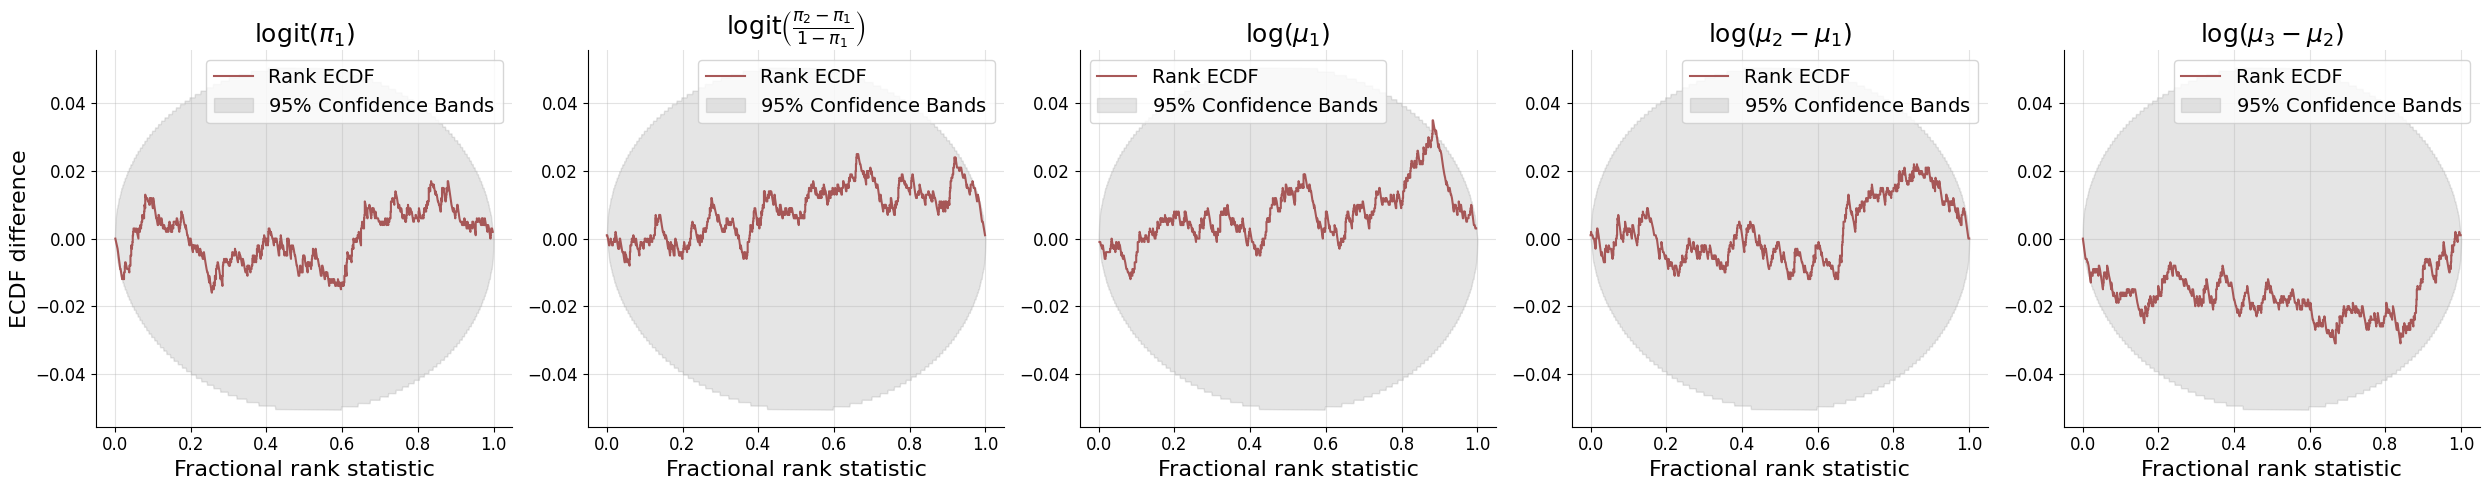

In [6]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, difference=True, param_names=model.param_names['unconstrained'])

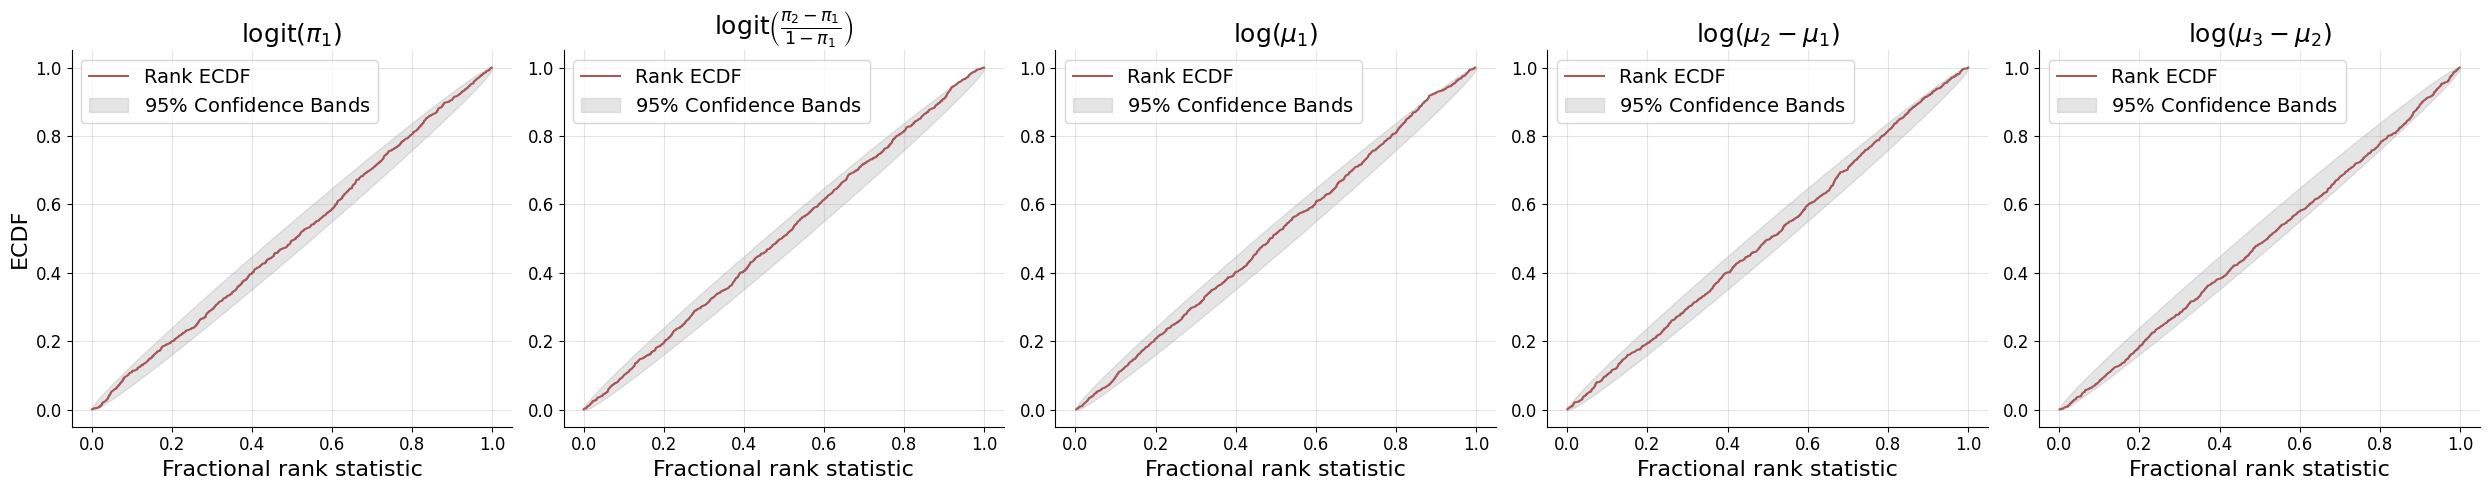

In [7]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, param_names=model.param_names['unconstrained'])

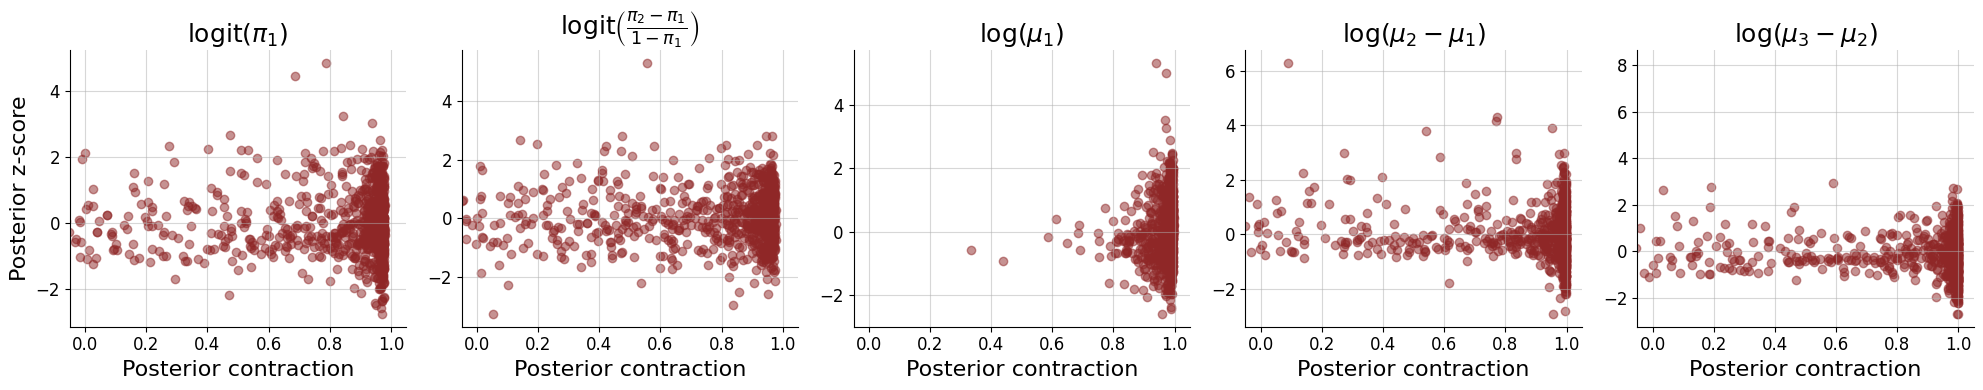

In [8]:
f = bf.diagnostics.plot_z_score_contraction(posterior, prior, param_names=model.param_names['unconstrained'])

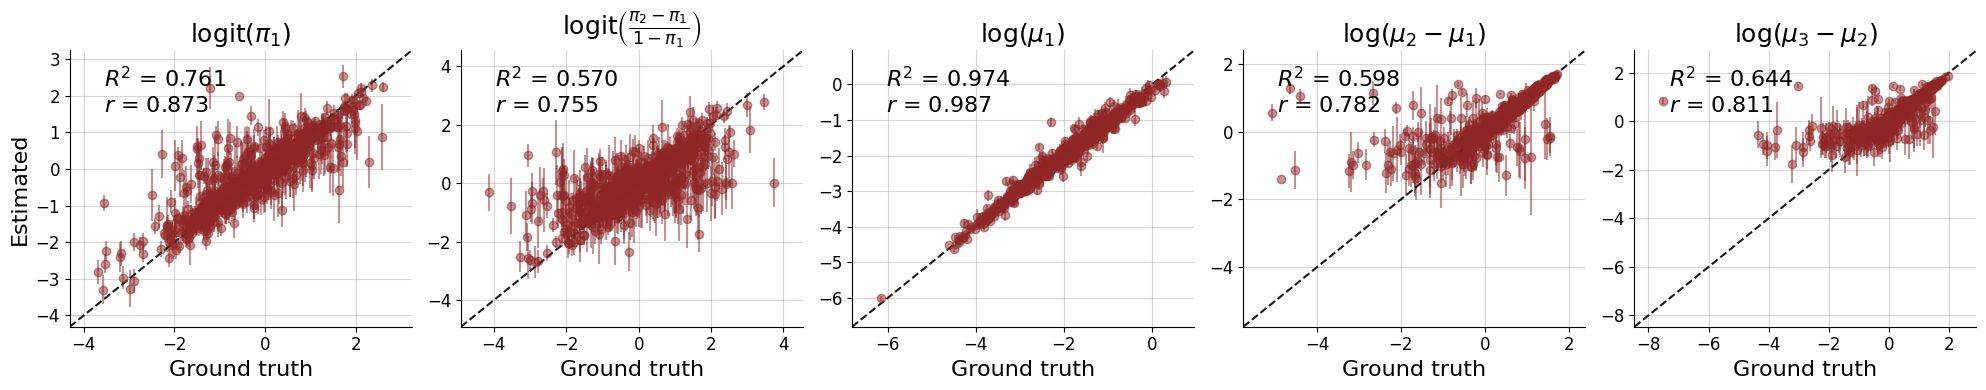

In [9]:
f = bf.diagnostics.plot_recovery(posterior, prior, param_names=model.param_names['unconstrained'], point_agg=np.nanmedian)

## Calibration (parameter posterior approximator)

### Constrained space

In [10]:
prior = constrain_parameters(prior)
posterior = constrain_parameters(posterior)

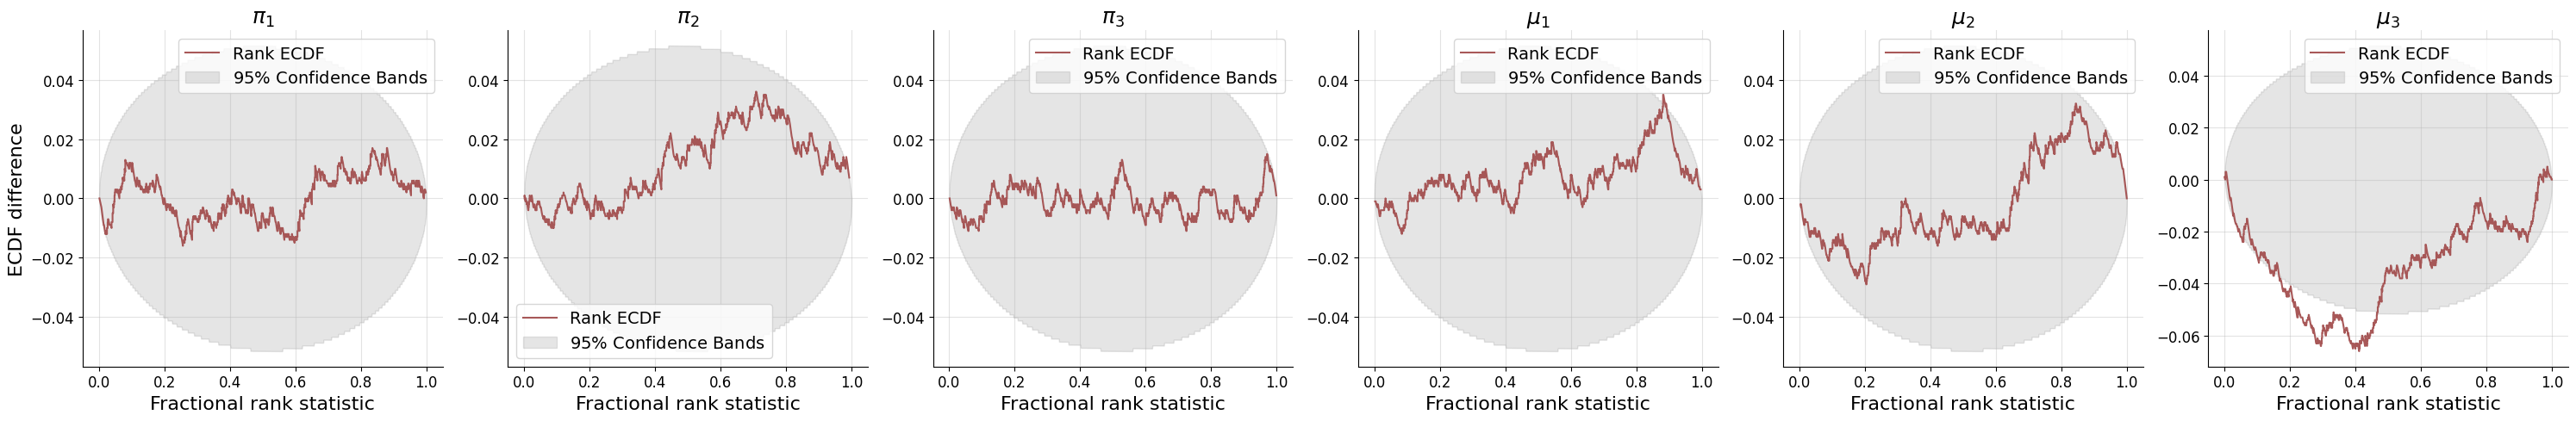

In [11]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, difference=True, param_names=model.param_names['constrained'])

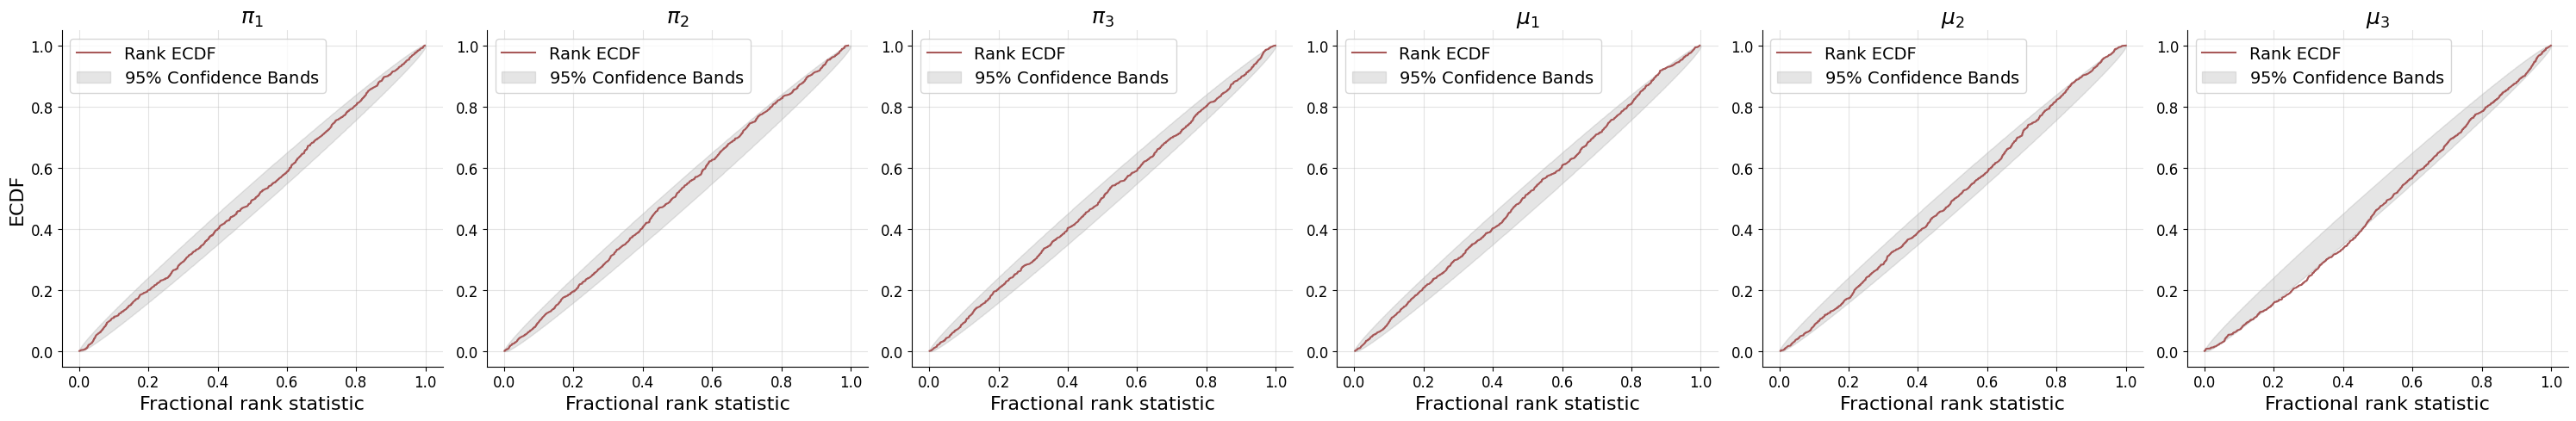

In [12]:
f = bf.diagnostics.plot_sbc_ecdf(posterior, prior, param_names=model.param_names['constrained'])

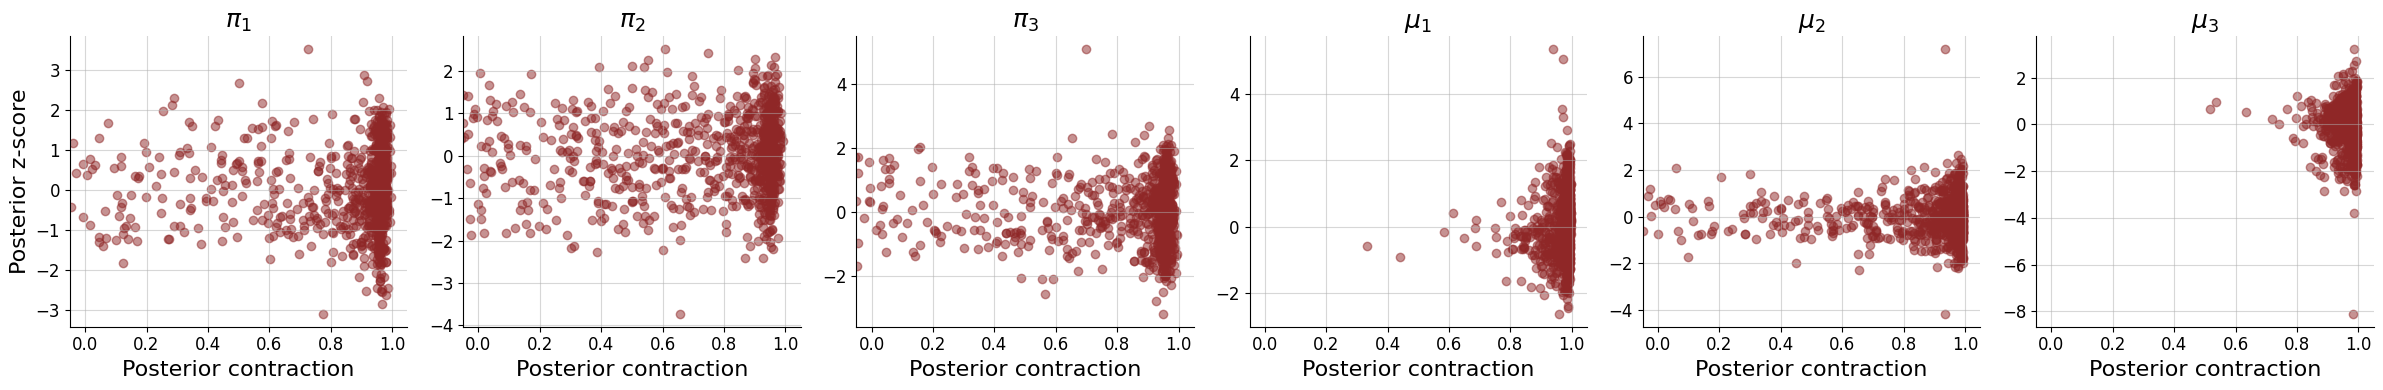

In [13]:
f = bf.diagnostics.plot_z_score_contraction(posterior, prior, param_names=model.param_names['constrained'])

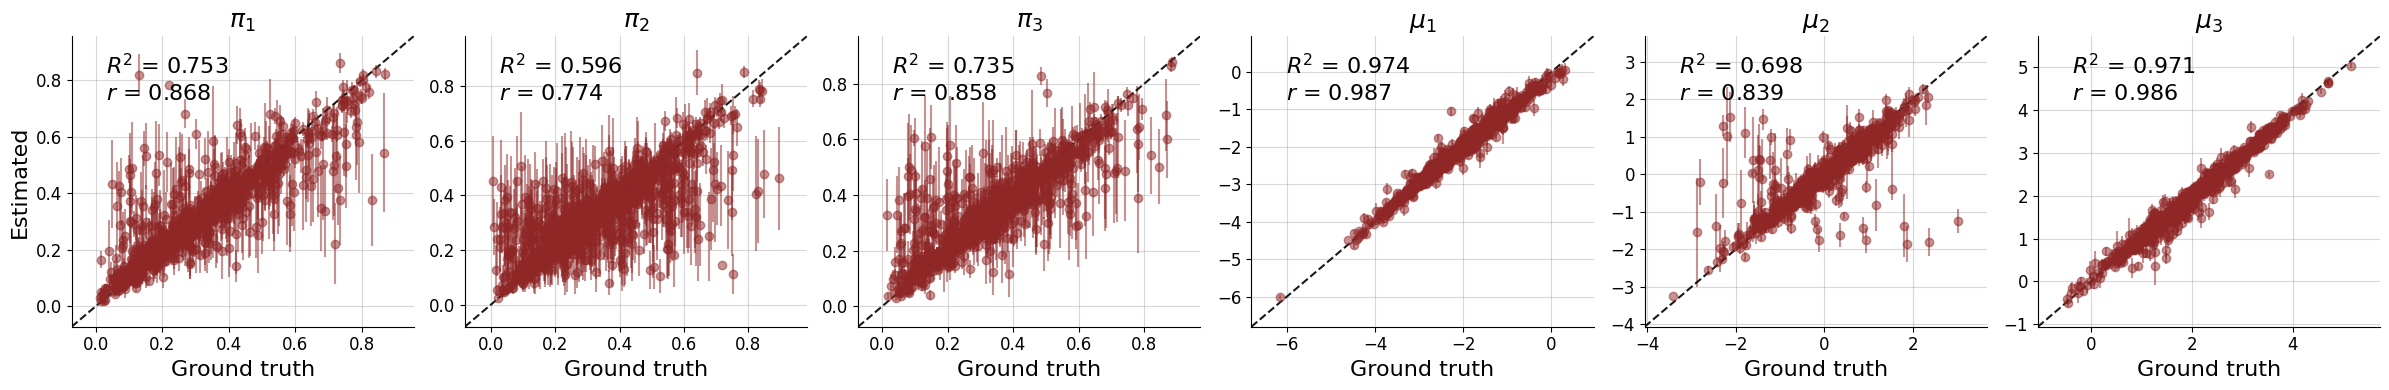

In [14]:
f = bf.diagnostics.plot_recovery(posterior, prior, param_names=model.param_names['constrained'], point_agg=np.nanmedian)